In [1]:
# This dataset contains information on default payments, demographic factors, 
# credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

Dataset Extracted from Kaggle:

Default Payments of Credit Card Clients in Taiwan from 2005

[Default of Credit Card Clients Dataset - Kaggle](https://www.kaggle.com/datasets/uciml/default-of-credit-card-clients-dataset)

Acknowledgements:

Click on the link provided below to get the original dataset from the UCI Machine Learning repository.

https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

In [2]:
# Analysis for this dataset is divided into 3 parts:

# 1.) We start by performing some descriptive statistics

# 2.) Then we dig into some prescriptive analysis

# 3.) And then we finally end by doing some predictive analysis

In [3]:
# There are 25 variables:
# ID: represents ID of each client
# LIMIT_BAL: Amount of given credit limit in NT dollars 
# Gender (1 = MALE, 2 = FEMALE)
# EDUCATION: (1 = GRADUATE SCHOOL, 2 = UNIVERSITY, 3 = HIGH SCHOOL, 4 = OTHERS)
# MARRIAGE: (1 = MARRIED, 2 = SINGLE, 3 = OTHERS)
# AGE: Age in years of customers

# PAY_1: Repayment status in September, 2005 (-1 = Pay duly, 1 = payment delay for one month, 2 = payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
# PAY_2: Repayment status in August, 2005 (scale same as above)
# PAY_3: Repayment status in July, 2005 (scale same as above)
# PAY_4: Repayment status in June, 2005 (scale same as above)
# PAY_5: Repayment status in May, 2005 (scale same as above)
# PAY_6: Repayment status in April, 2005 (scale same as above)

# -2: No consumption; -1: Paid in full; 0: The use of revolving credit; 1 = payment delay for one month; 
# 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.


# BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
# BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
# BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
# BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
# BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
# BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)


# PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
# PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
# PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
# PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
# PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
# PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

# Default: Default in payment next month (1 = yes, 0 = no)

In [4]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = "whitegrid", palette = "rainbow")
import matplotlib.colors as mcolors
import missingno as msno # to deal with missing 
%config InlineBackend.figure_format = 'retina'

In [5]:
# Importing dataset

credit_card_data = pd.read_csv('UCI_Credit_Card.csv') 

credit_card_data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


credit_card_data['LIMIT_BAL'] # ------- # Quantitative / Numerical -------- # Discrete

credit_card_data['Sex'] # ------- # Categorical / Qualitative -------- # Nominal

credit_card_data['EDUCATION'] # ------- # Categorical / Qualitative -------- # Ordinal

credit_card_data['MARRIAGE'] # ------- # Categorical / Qualitative -------- # Ordinal

credit_card_data['AGE'] # ------- # Quantitative / Numerical -------- # Discrete

credit_card_data['PAY_0'] # ------- # Categorical / Qualitative -------- # Ordinal

credit_card_data['PAY_2'] # ------- # Categorical / Qualitative -------- # Ordinal

credit_card_data['PAY_3'] # ------- # Categorical / Qualitative -------- # Ordinal

credit_card_data['PAY_4'] # ------- # Categorical / Qualitative -------- # Ordinal

credit_card_data['PAY_5'] # ------- # Categorical / Qualitative -------- # Ordinal

credit_card_data['PAY_6'] # ------- # Categorical / Qualitative -------- # Ordinal

credit_card_data['BILL_AMT1'] # ------- # Quantitative / Numerical -------- # Discrete

credit_card_data['BILL_AMT2'] # ------- # Quantitative / Numerical -------- # Discrete

credit_card_data['BILL_AMT3'] # ------- # Quantitative / Numerical -------- # Discrete

credit_card_data['BILL_AMT4'] # ------- # Quantitative / Numerical -------- # Discrete

credit_card_data['BILL_AMT5'] # ------- # Quantitative / Numerical -------- # Discrete

credit_card_data['BILL_AMT6'] # ------- # Quantitative / Numerical -------- # Discrete

credit_card_data['PAY_AMT1'] # ------- # Quantitative / Numerical -------- # Discrete

credit_card_data['PAY_AMT2'] # ------- # Quantitative / Numerical -------- # Discrete

credit_card_data['PAY_AMT3'] # ------- # Quantitative / Numerical -------- # Discrete

credit_card_data['PAY_AMT4'] # ------- # Quantitative / Numerical -------- # Discrete

credit_card_data['PAY_AMT5'] # ------- # Quantitative / Numerical -------- # Discrete

credit_card_data['PAY_AMT6'] # ------- # Quantitative / Numerical -------- # Discrete

credit_card_data['DEFAULT'] # ------- # Categorical / Qualitative -------- # Nominal

In [6]:
credit_card_data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


Education Column values: [2 1 3 5 4 6 0]


Text(0, 0.5, 'Number Of Clients')

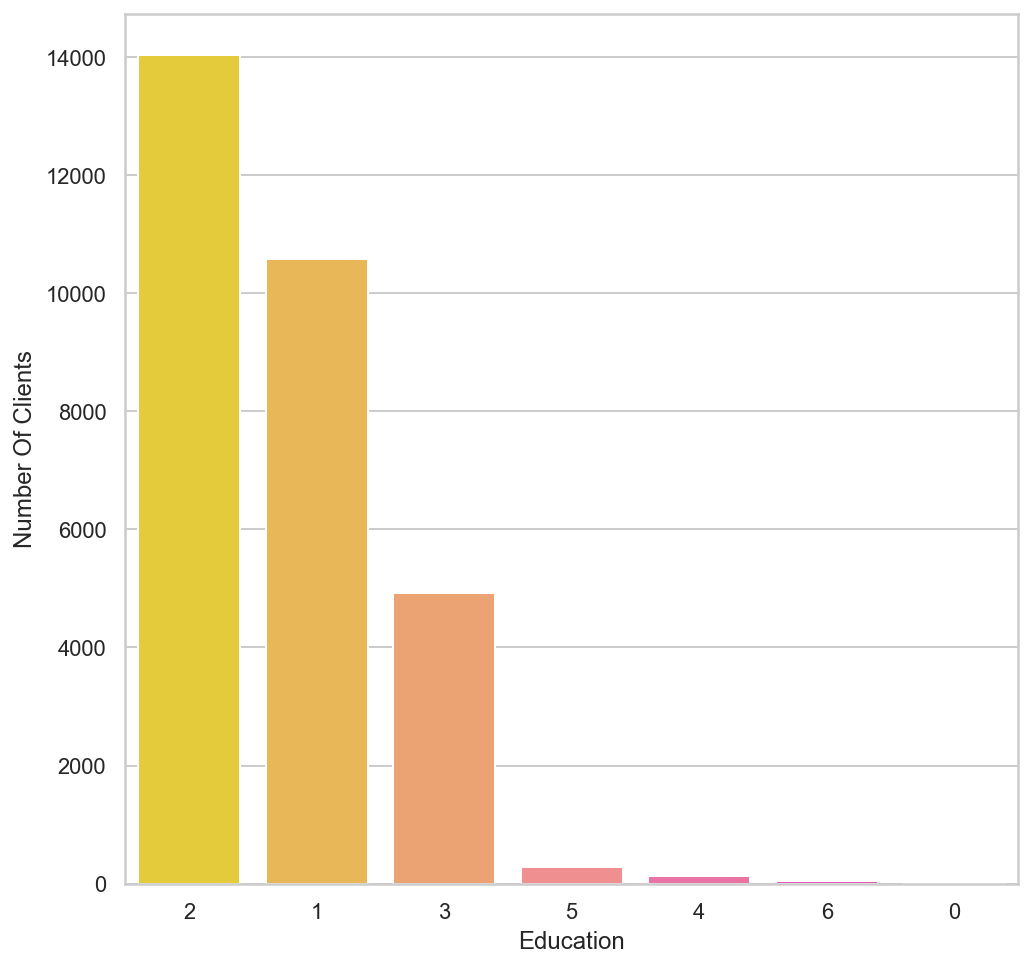

In [7]:
# Pre - Processing the data

# EDA Analysis

print('Education Column values:', credit_card_data['EDUCATION'].unique())

plt.figure(figsize = (8, 8))
plt.xticks(rotation = 0, horizontalalignment = "center")
sns.countplot(x ='EDUCATION', data = credit_card_data, palette = "spring_r", order = credit_card_data['EDUCATION'].value_counts().index)
plt.xlabel('Education')
plt.ylabel('Number Of Clients')

Education Column values: [2 1 3 4]
Total percentage of graduates is 35%
Total percentage of university graduates is 47%
Total percentage of high school graduates is 16%
Total percentage of other graduates is 2%


Text(0, 0.5, 'Number of clients')

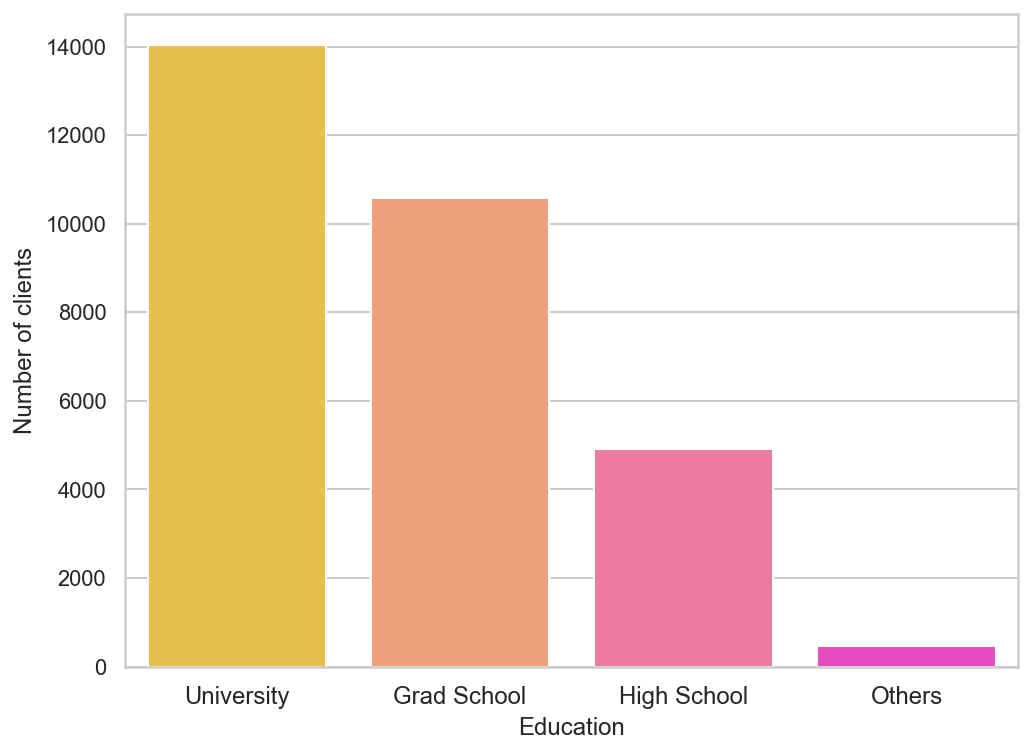

In [8]:
# In the Education column were are basically re-assigining variable breakdown of 0 and above 4 to 4 to restrict outliers

credit_card_data['EDUCATION'] = credit_card_data['EDUCATION'].apply(lambda x: x 
                                                                    if  ((x > 0  and x < 4 )) 
                                                                    else 4)

print('Education Column values:', credit_card_data['EDUCATION'].unique())

# Percentage of each value in the 'EDUCATION' column.
total = credit_card_data["EDUCATION"].shape[0]

graduates = round(credit_card_data[credit_card_data["EDUCATION"] == 1].shape[0] * 100 / total)
university_per = round(credit_card_data[credit_card_data["EDUCATION"] == 2].shape[0] * 100 / total)
high_school_per = round(credit_card_data[credit_card_data["EDUCATION"] == 3].shape[0] * 100 / total)
other = round(credit_card_data[credit_card_data["EDUCATION"] == 4].shape[0] * 100 / total)

print(f"Total percentage of graduates is {graduates}%")
print(f"Total percentage of university graduates is {university_per}%")
print(f"Total percentage of high school graduates is {high_school_per}%")
print(f"Total percentage of other graduates is {other}%")

plt.figure(figsize=(8,6))
plt.xticks(rotation=0, horizontalalignment="center")
sns.countplot(x='EDUCATION', data=credit_card_data, palette="spring_r", order = credit_card_data['EDUCATION'].value_counts().index)
plt.xticks([0,1,2,3], ['University', 'Grad School', 'High School', 'Others'], fontsize=12)
plt.xlabel('Education')
plt.ylabel('Number of clients')

Marriage Column values: [1 2 3 0]


Text(0, 0.5, 'Number of clients')

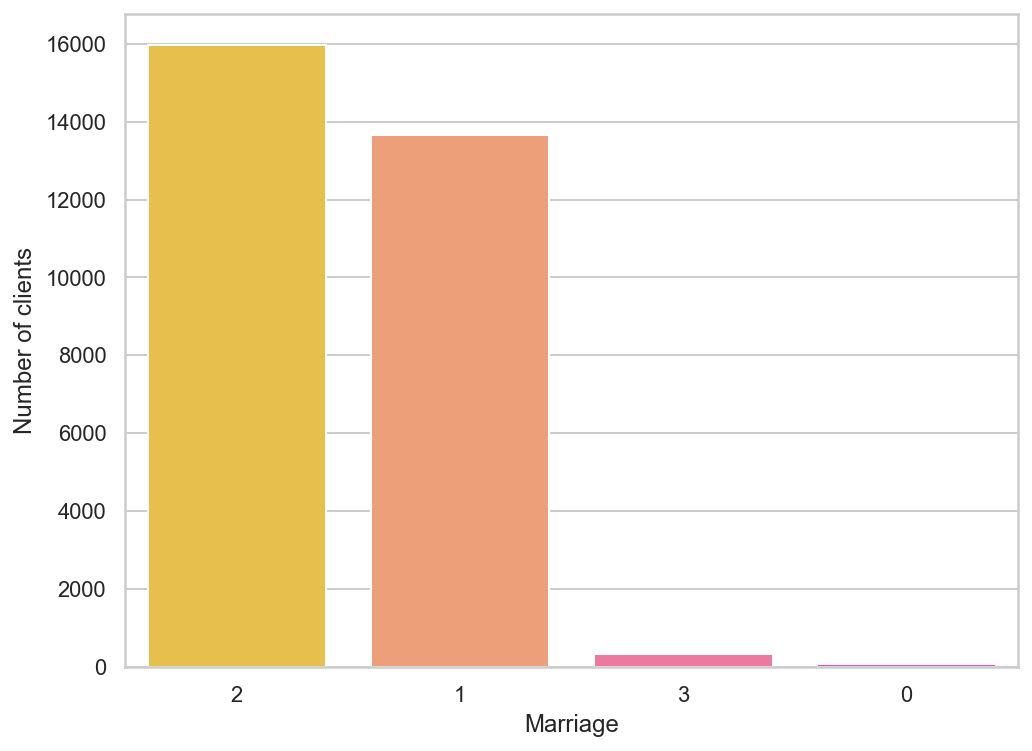

In [9]:
print('Marriage Column values:', credit_card_data['MARRIAGE'].unique())

plt.figure(figsize = (8, 6))
plt.xticks(rotation = 0, horizontalalignment = "center")
sns.countplot(x = 'MARRIAGE', data = credit_card_data, palette = "spring_r", order = credit_card_data['MARRIAGE'].value_counts().index)
plt.xlabel('Marriage')
plt.ylabel('Number of clients')

Marriage Column values: [1 2 3 0]
Total percentage of people who are married are 46%
Total percentage of people people who are single 53%
Total percentage of other people 1%


Text(0, 0.5, 'Number of clients')

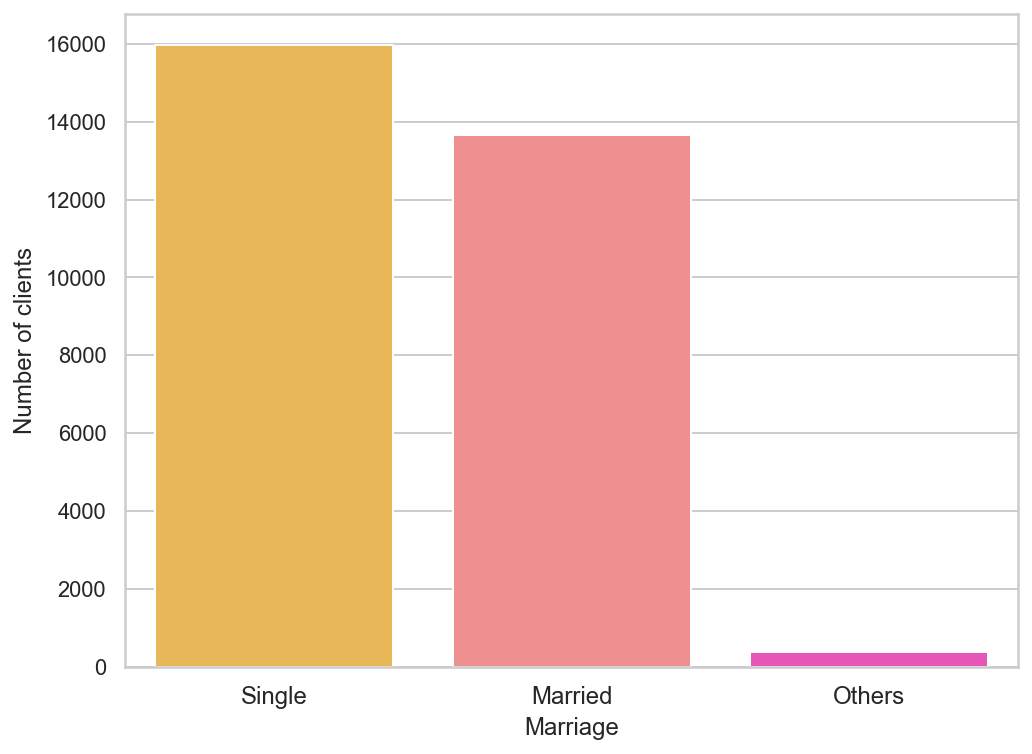

In [10]:
# In the Marriage column were are basically re-assigining variable breakdown of 0 to 3 to restrict outliers

print('Marriage Column values:', credit_card_data['MARRIAGE'].unique())

# Percentage of the values in the 'MARRIAGE' column.
married_per = round(credit_card_data[credit_card_data['MARRIAGE'] == 1].shape[0] * 100 / credit_card_data['MARRIAGE'].shape[0])
single_per = round(credit_card_data[credit_card_data['MARRIAGE'] == 2].shape[0] * 100 / credit_card_data['MARRIAGE'].shape[0])
other_per = round(credit_card_data[credit_card_data['MARRIAGE'] == 3].shape[0] * 100 / credit_card_data['MARRIAGE'].shape[0])

print(f"Total percentage of people who are married are {married_per}%")
print(f"Total percentage of people people who are single {single_per}%")
print(f"Total percentage of other people {other_per}%")

credit_card_data['MARRIAGE'] = credit_card_data['MARRIAGE'].apply(lambda x: x 
                                                                    if  ((x > 0  and x < 3 )) 
                                                                    else 3)

plt.figure(figsize=(8, 6))
plt.xticks(rotation=0, horizontalalignment="center")
sns.countplot(x='MARRIAGE', data=credit_card_data, palette="spring_r", order = credit_card_data['MARRIAGE'].value_counts().index)
plt.xticks([0,1,2], ['Single', 'Married', 'Others'], fontsize=12)
plt.xlabel('Marriage')
plt.ylabel('Number of clients')

In [11]:
# Renaming few columns for ease of understanding

credit_card_data = credit_card_data.rename(columns={'SEX': 'GENDER', 'PAY_0': 'PAY_1', 'default.payment.next.month': 'DEFAULT'})

In [12]:
credit_card_data

,ID,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,DEFAULT
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


<AxesSubplot:>

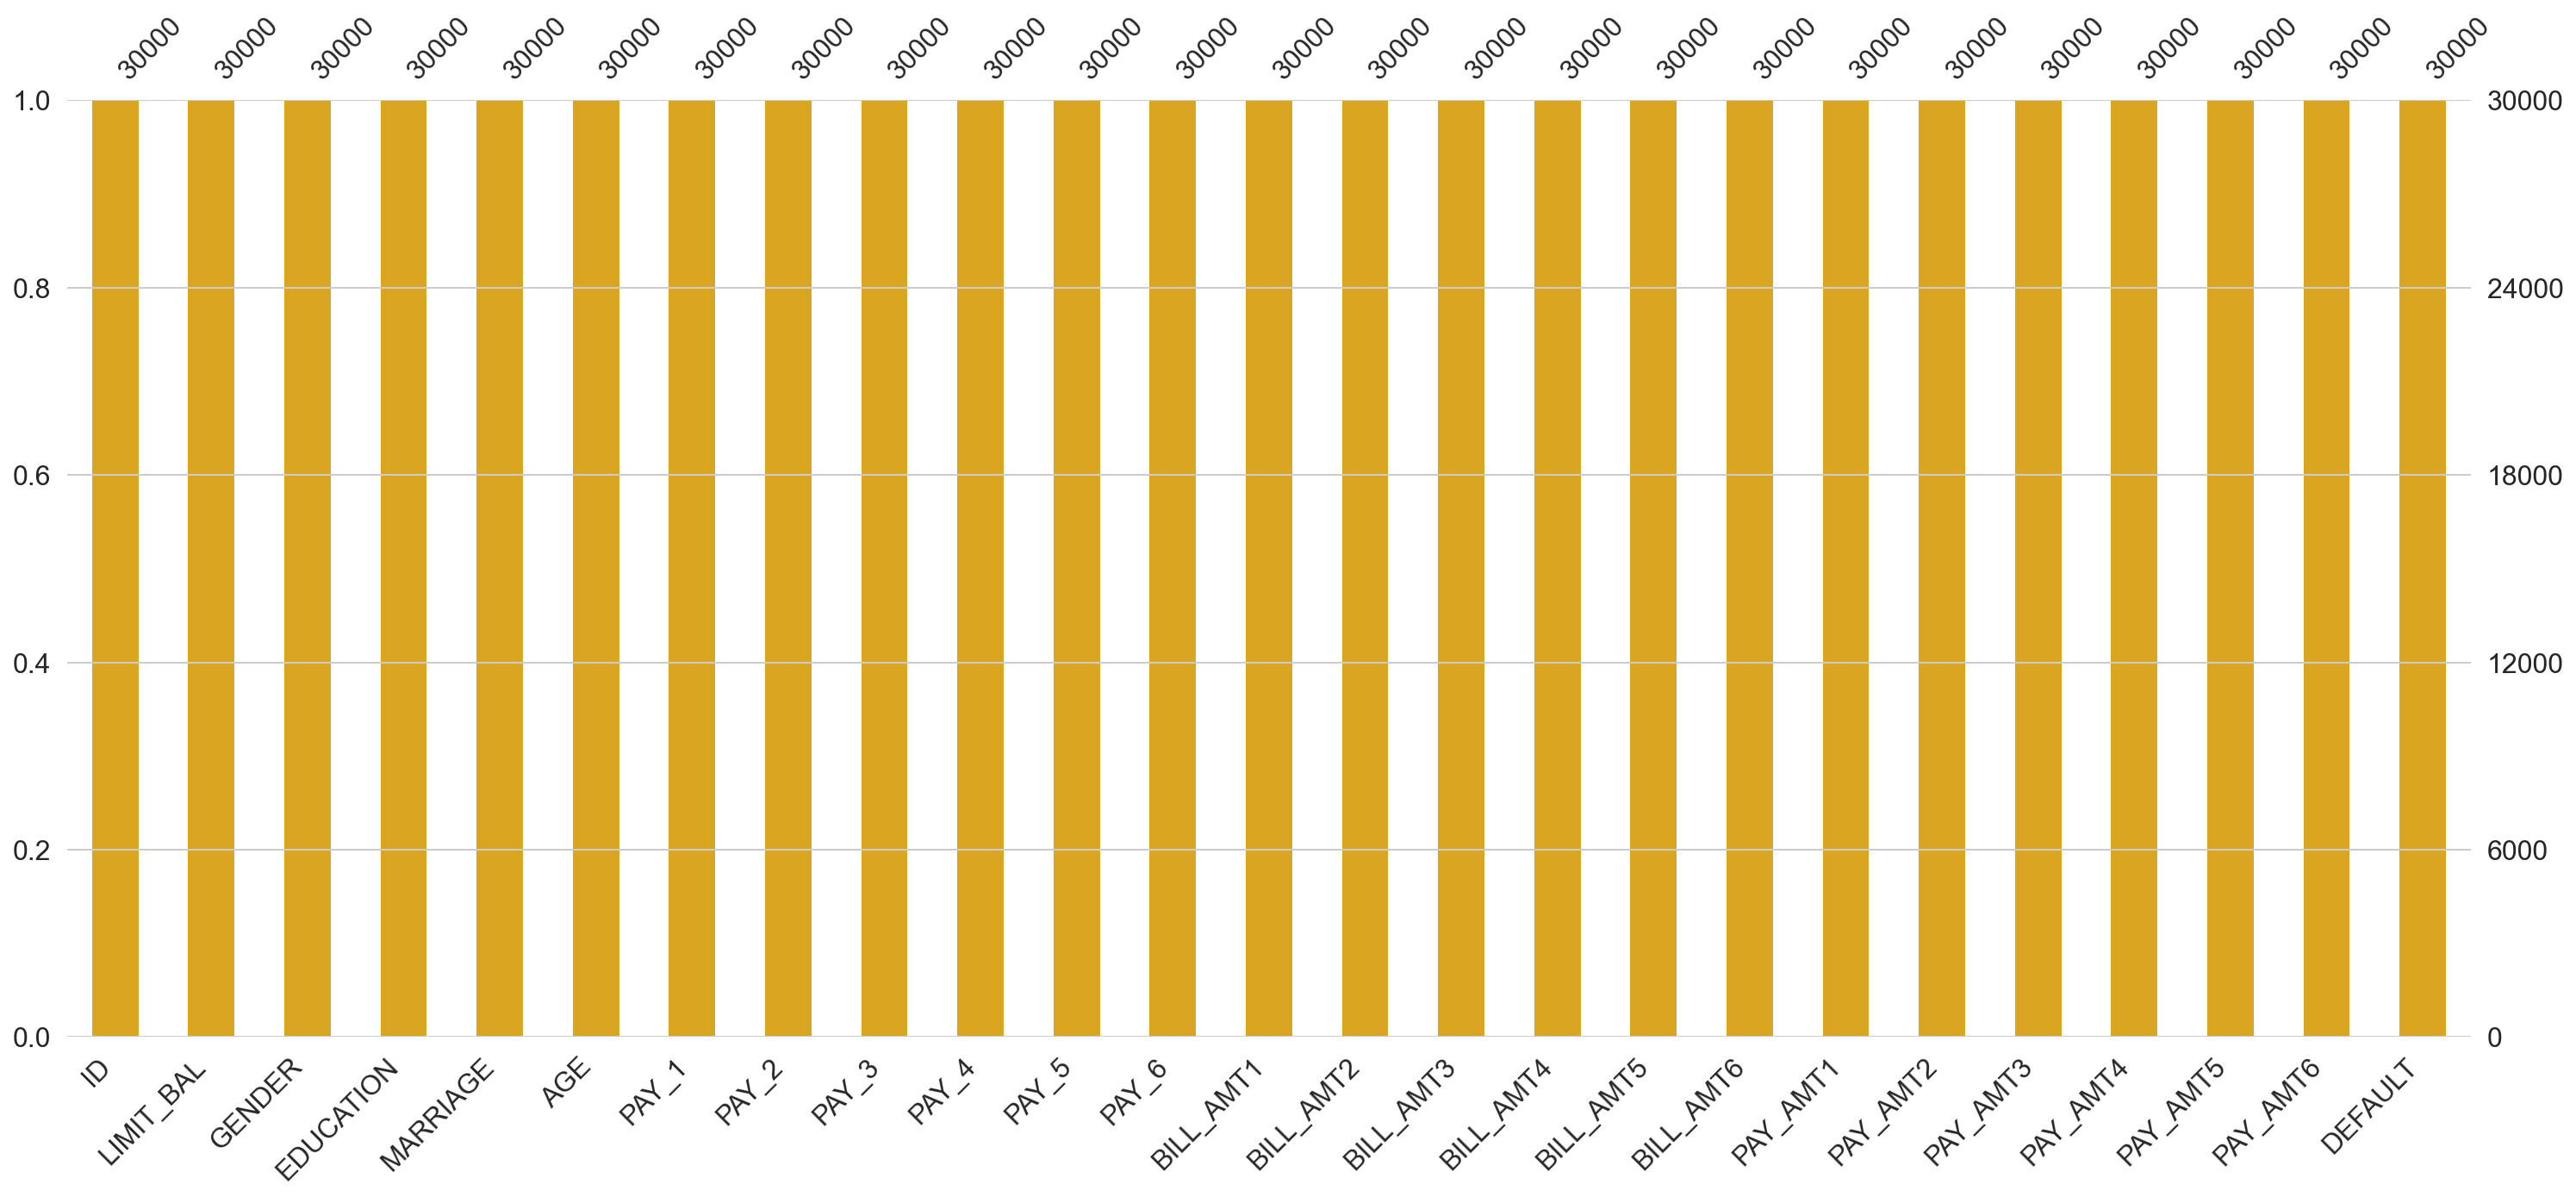

In [13]:
msno.bar(credit_card_data, color = 'goldenrod')

Text(0, 0.5, 'Number of Clients')

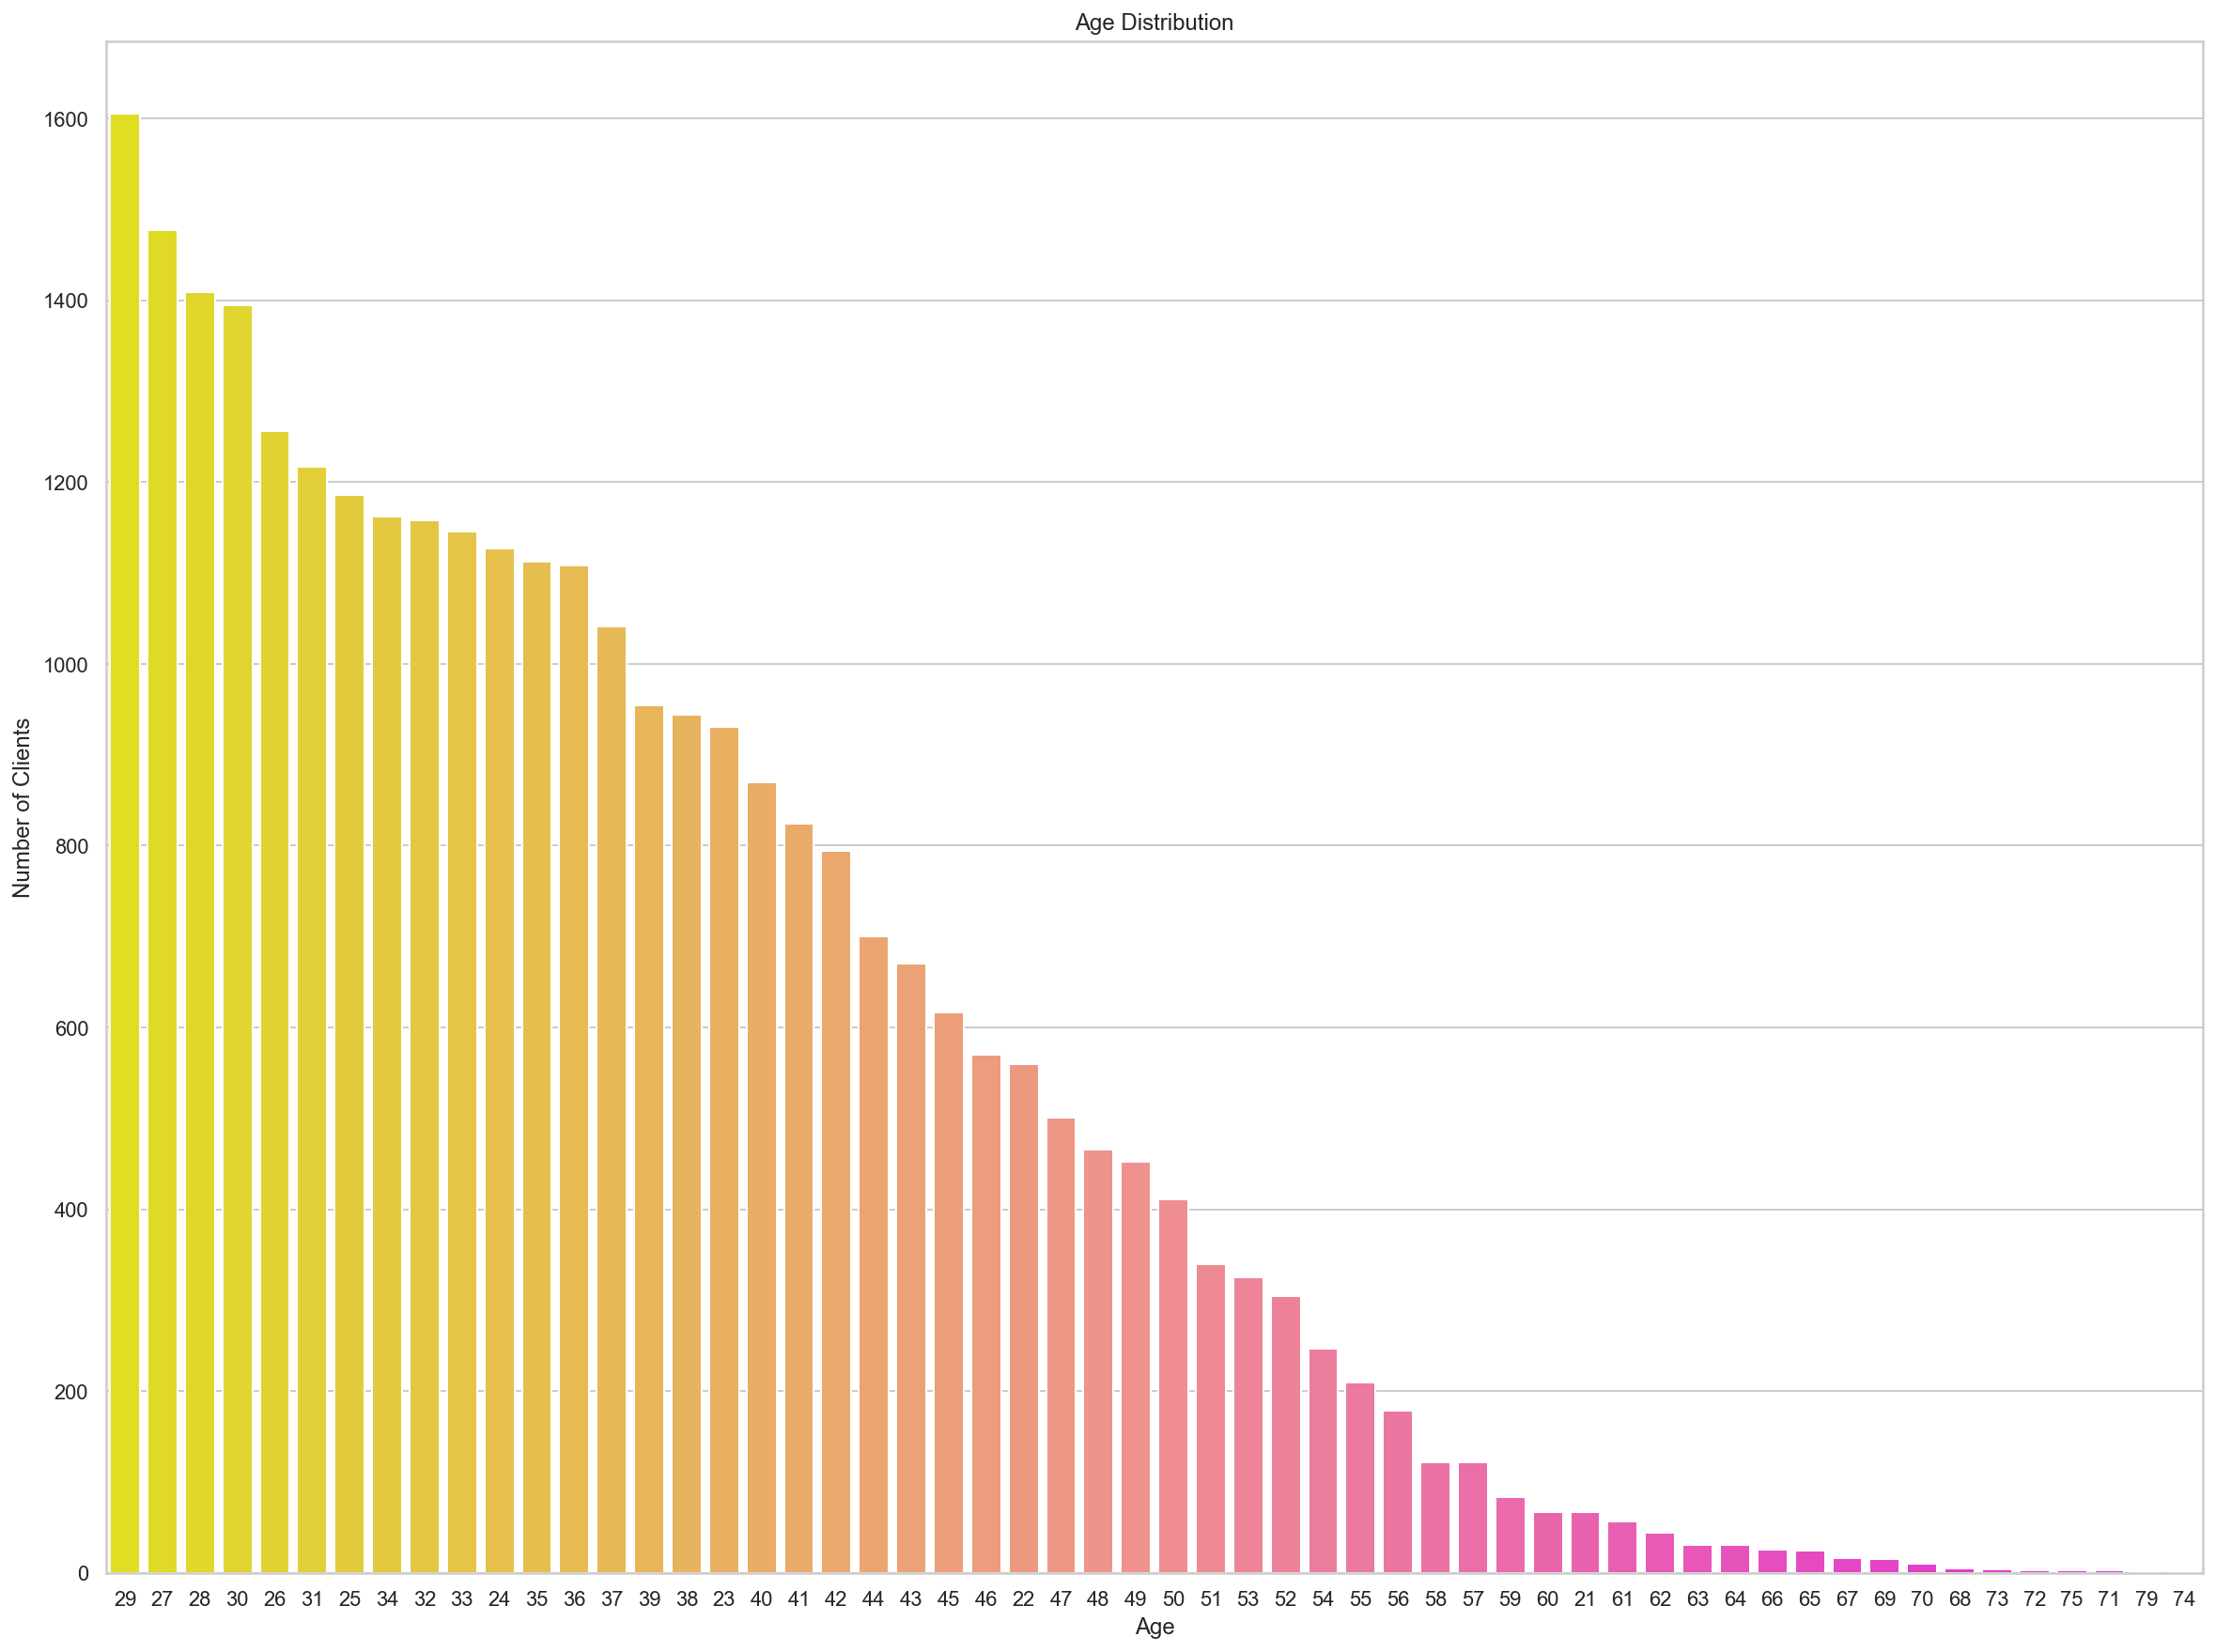

In [14]:
plt.figure(figsize=(20,15))
plt.xticks(rotation = 0, horizontalalignment = "center")
sns.countplot(x = 'AGE', data = credit_card_data, palette = "spring_r", order = credit_card_data['AGE'].value_counts().index)
plt.title('Age Distribution')
plt.xlabel("Age")
plt.ylabel("Number of Clients")

Text(0.5, 1.0, 'LIMIT BALANCE OF CREDIT CARD')

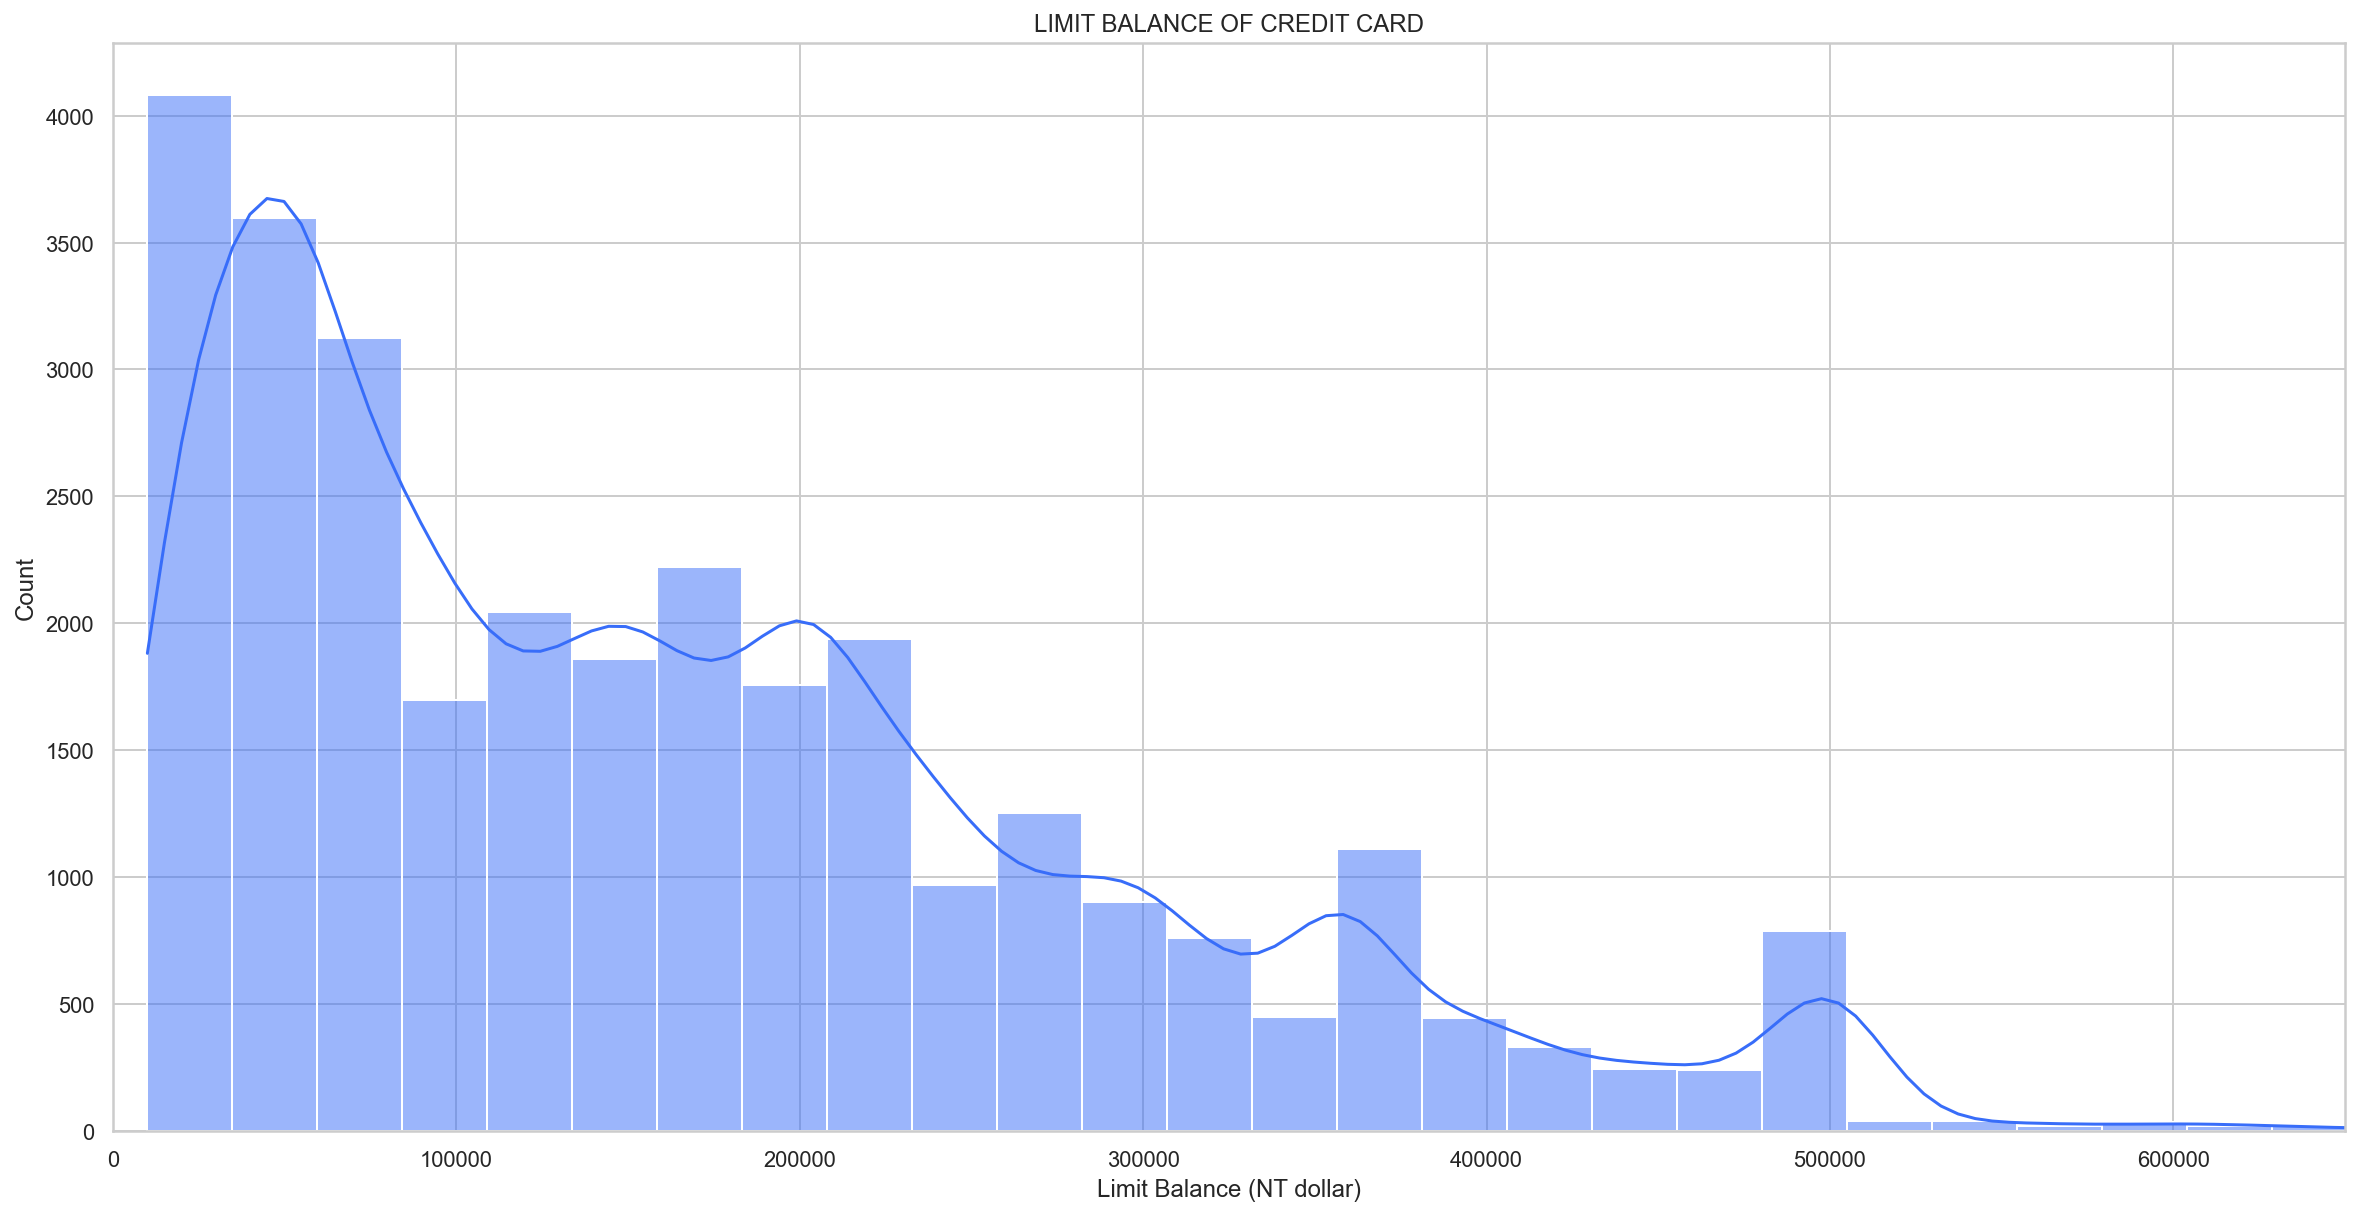

In [15]:
plt.figure(figsize = (20, 10))
sns.histplot(x = 'LIMIT_BAL', palette = "spring_r", data = credit_card_data, bins = 40, multiple = "stack" , kde = True)
plt.xlim([0, 650000])
plt.xlabel('Limit Balance (NT dollar)')
plt.title('LIMIT BALANCE OF CREDIT CARD')

Text(0.9, 8000, '22.1%')

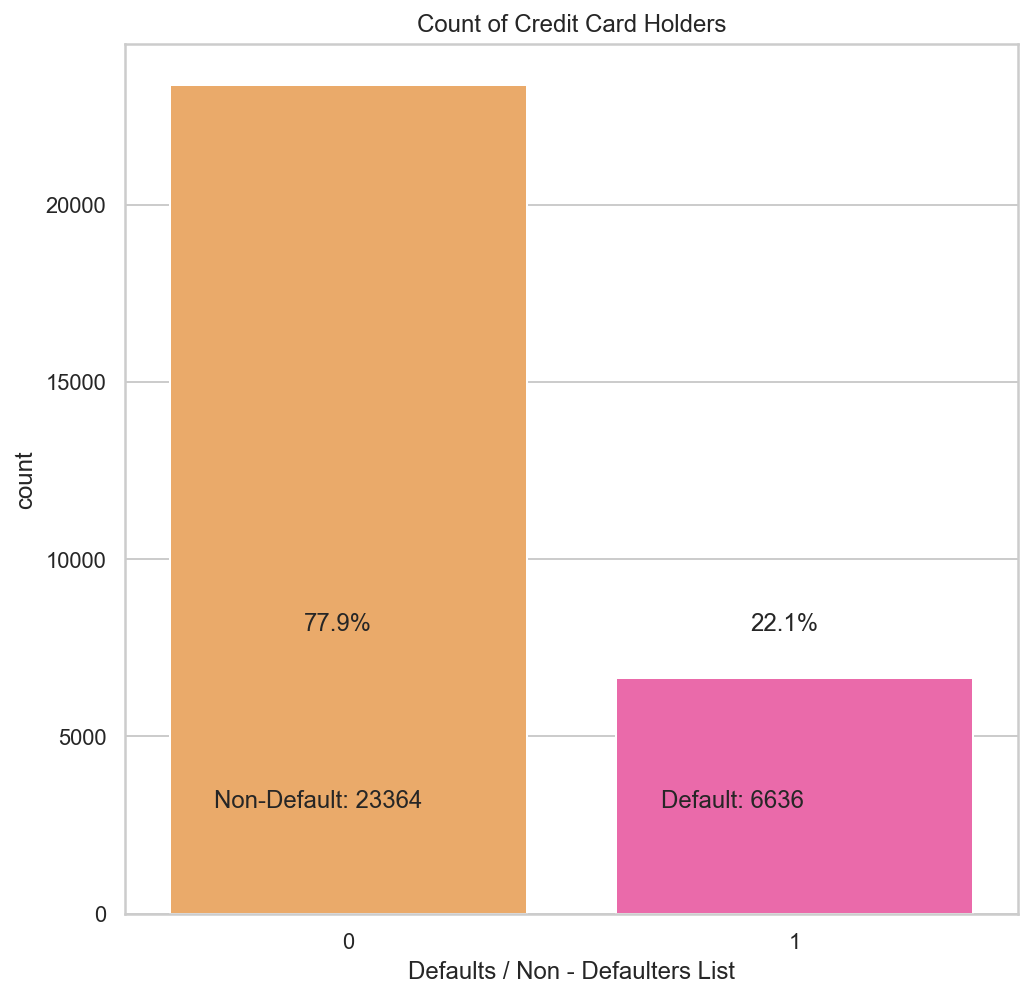

In [16]:
plt.figure(figsize = (8, 8))
plt.xticks(rotation = 0, horizontalalignment = "center")
sns.countplot(x = 'DEFAULT', data = credit_card_data, palette = "spring_r")
plt.title('Count of Credit Card Holders')
sns.set_context('talk', font_scale = 1.2)
plt.xlabel("Defaults / Non - Defaulters List")

yes = credit_card_data.DEFAULT.sum()
no = len(credit_card_data) - yes

yes_perc = round(yes / len(credit_card_data) * 100, 1)
no_perc = round(no / len(credit_card_data) * 100, 1)
plt.annotate('Non-Default: {}'.format(no), xy = (-0.3, 15000), xytext = (-0.3, 3000), size = 12)
plt.annotate('Default: {}'.format(yes), xy = (0.7, 15000), xytext = (0.7, 3000), size = 12)
plt.annotate(str(no_perc)+"%", xy = (-0.3, 15000), xytext = (-0.1, 8000), size = 12)
plt.annotate(str(yes_perc)+"%", xy = (0.7, 15000), xytext = (0.9, 8000), size = 12)

Text(0.5, 1.0, 'Relationship of Education and Default')

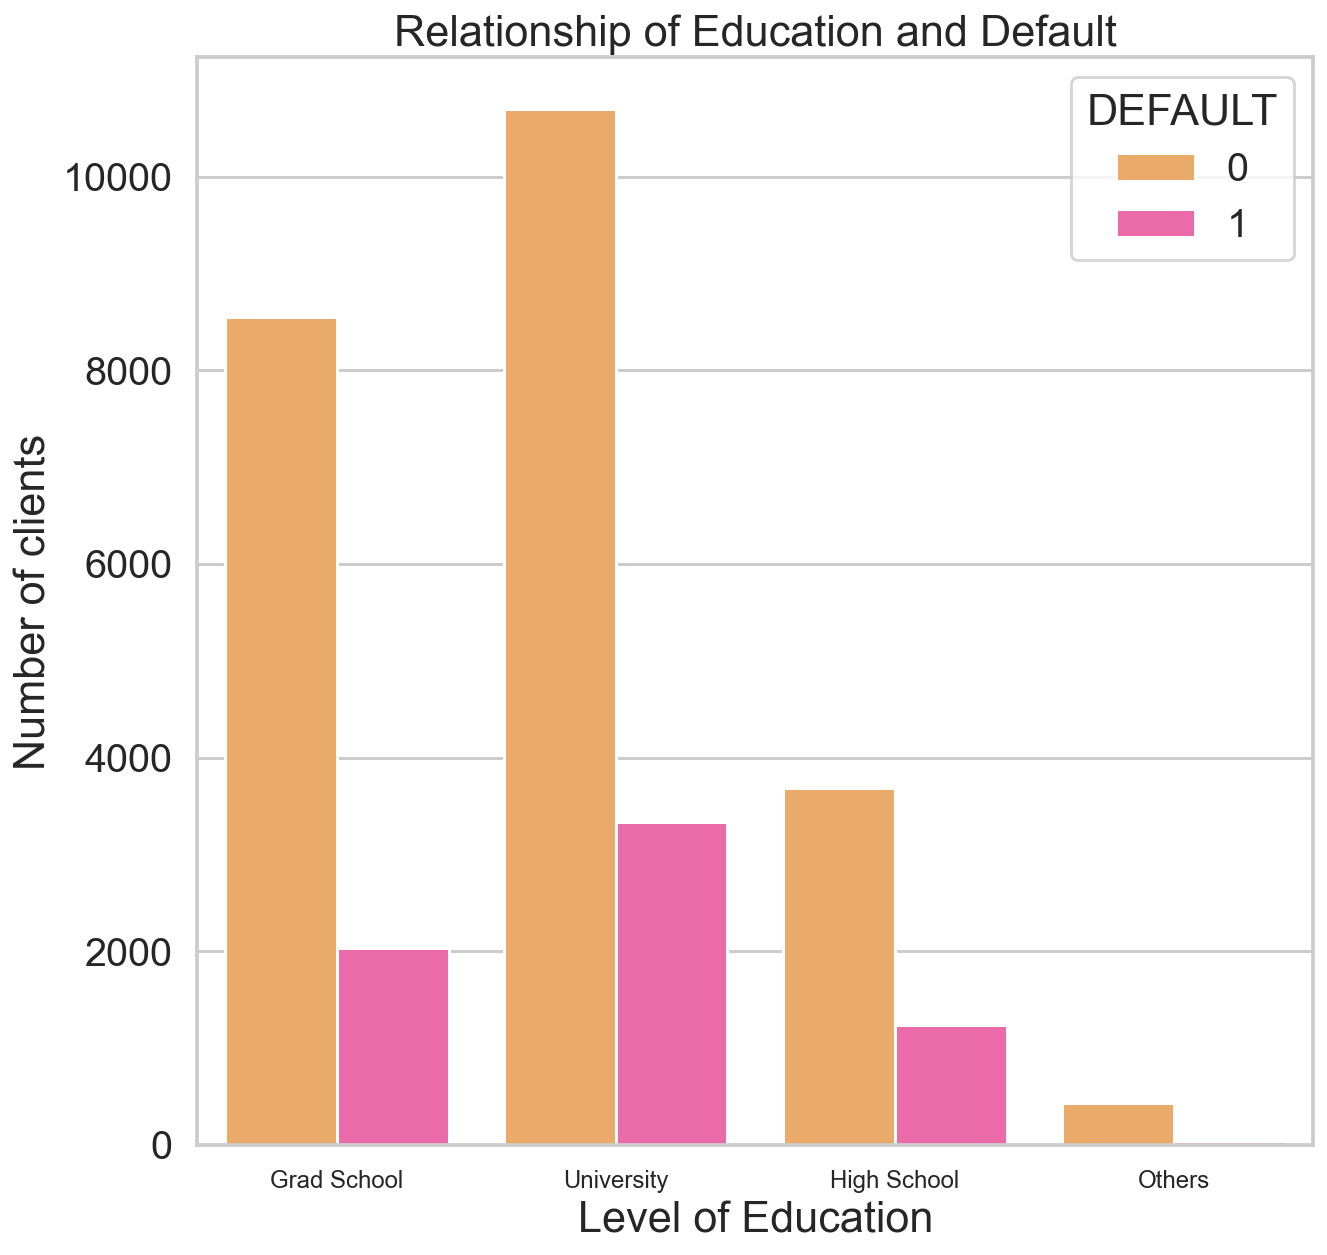

In [17]:
plt.figure(figsize = (10,10))
sns.countplot(data = credit_card_data, x = 'EDUCATION', hue = 'DEFAULT', palette = "spring_r")
plt.xlabel('Level of Education')
plt.xticks([0,1,2,3], ['Grad School', 'University', 'High School', 'Others'], fontsize = 12)
plt.ylabel('Number of clients')
plt.title('Relationship of Education and Default')

In [18]:
# As evident from the above graph university graduates are more susceptible of defaulting credit card payments.
# This trend seems to be bizzare, as ideally one could assume that high school graduates would be more prone to defaulting payments
# However, in this dataset example, they seem to be more financially literate than university graduates.

Total number of women are 18112
Total number of men are 11888
The percentage of male clients are 40%
The percentage of female clients are 60%


Text(0.5, 1.0, 'Relationship of Gender and Default')

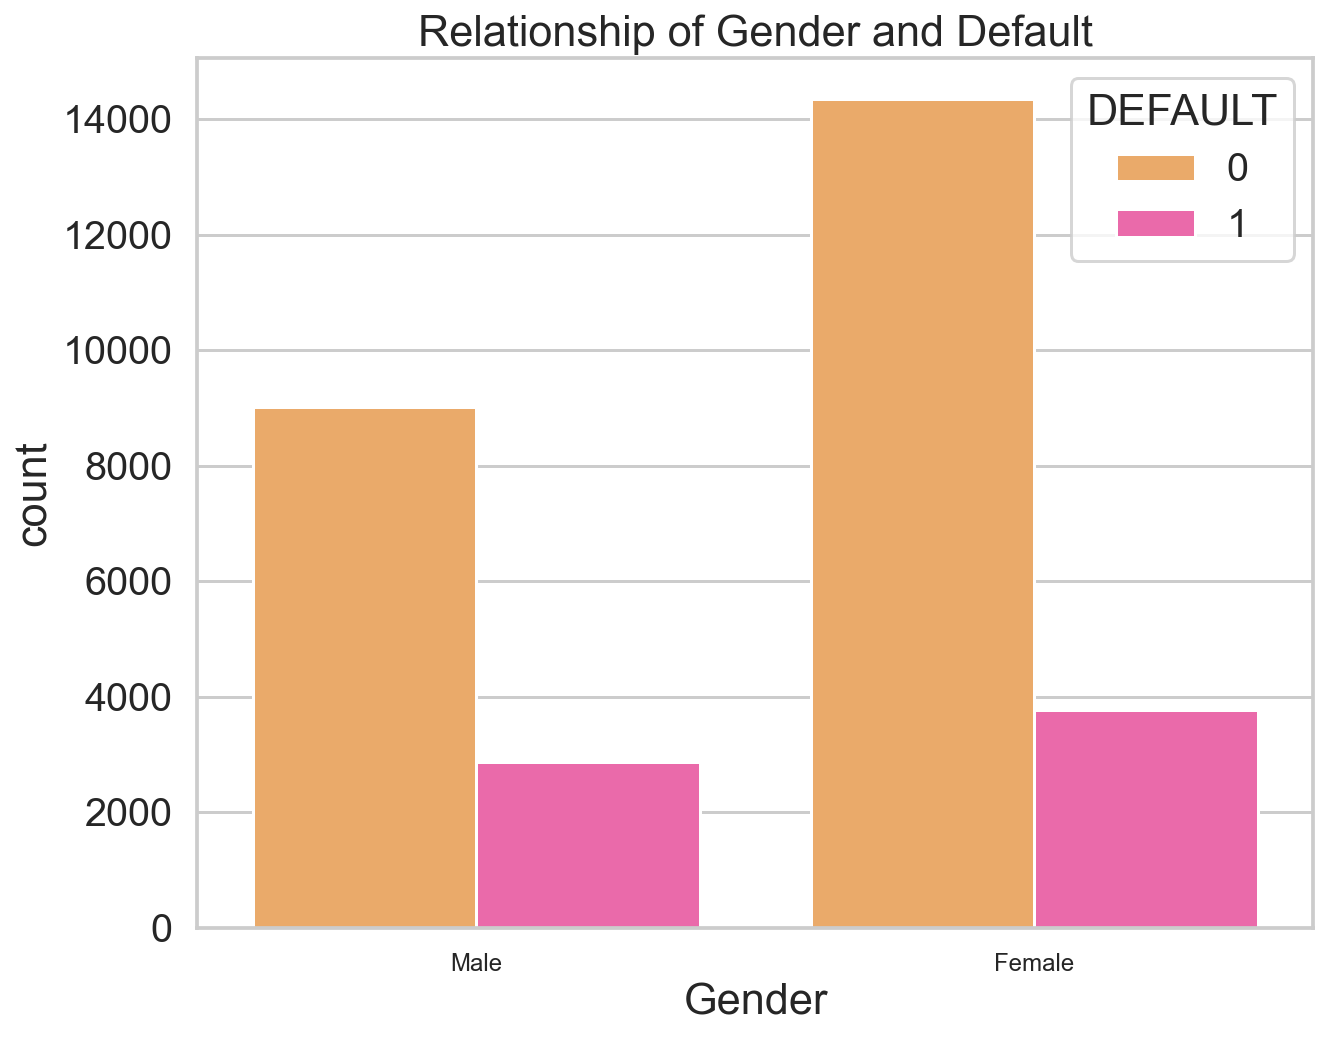

In [19]:
# Counts of male and female clients.
female = credit_card_data.loc[credit_card_data["GENDER"] == 2, "GENDER"].shape[0]

male = credit_card_data.loc[credit_card_data["GENDER"] == 1, "GENDER"].shape[0]

print("Total number of women are", female)

print("Total number of men are", male)

# Percentage of male and female clients.
male_per = round(male * 100 / credit_card_data.loc[credit_card_data["GENDER"], "GENDER"].shape[0])
women_per = round(female * 100 / credit_card_data.loc[credit_card_data["GENDER"], "GENDER"].shape[0])

print(f"The percentage of male clients are {male_per}%")
print(f"The percentage of female clients are {women_per}%")

plt.figure(figsize= (10, 8))
sns.countplot(data = credit_card_data, x = 'GENDER', hue = 'DEFAULT', palette = "spring_r")
plt.xticks([0,1], ['Male', 'Female'], fontsize = 12)
plt.xlabel('Gender')
plt.title('Relationship of Gender and Default')

<AxesSubplot:xlabel='GENDER', ylabel='EDUCATION'>

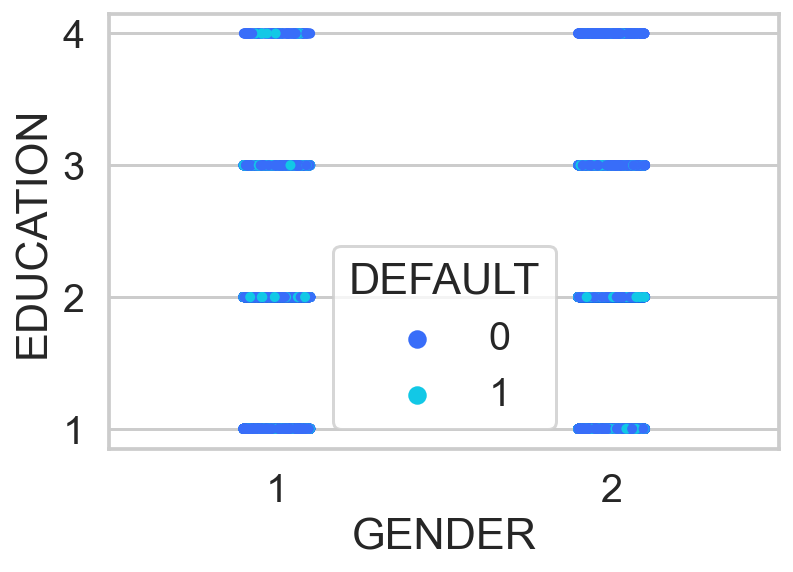

In [43]:
sns.stripplot(x = "GENDER", y = "EDUCATION", hue = 'DEFAULT', data = credit_card_data)
# sns.boxplot(x='class',y='age',data=titanic, palette='rainbow')

In [21]:
# From the above graph females are more prone to default on credit card payments. 

Text(0.5, 1.0, 'Relationship of Marital Status and Default')

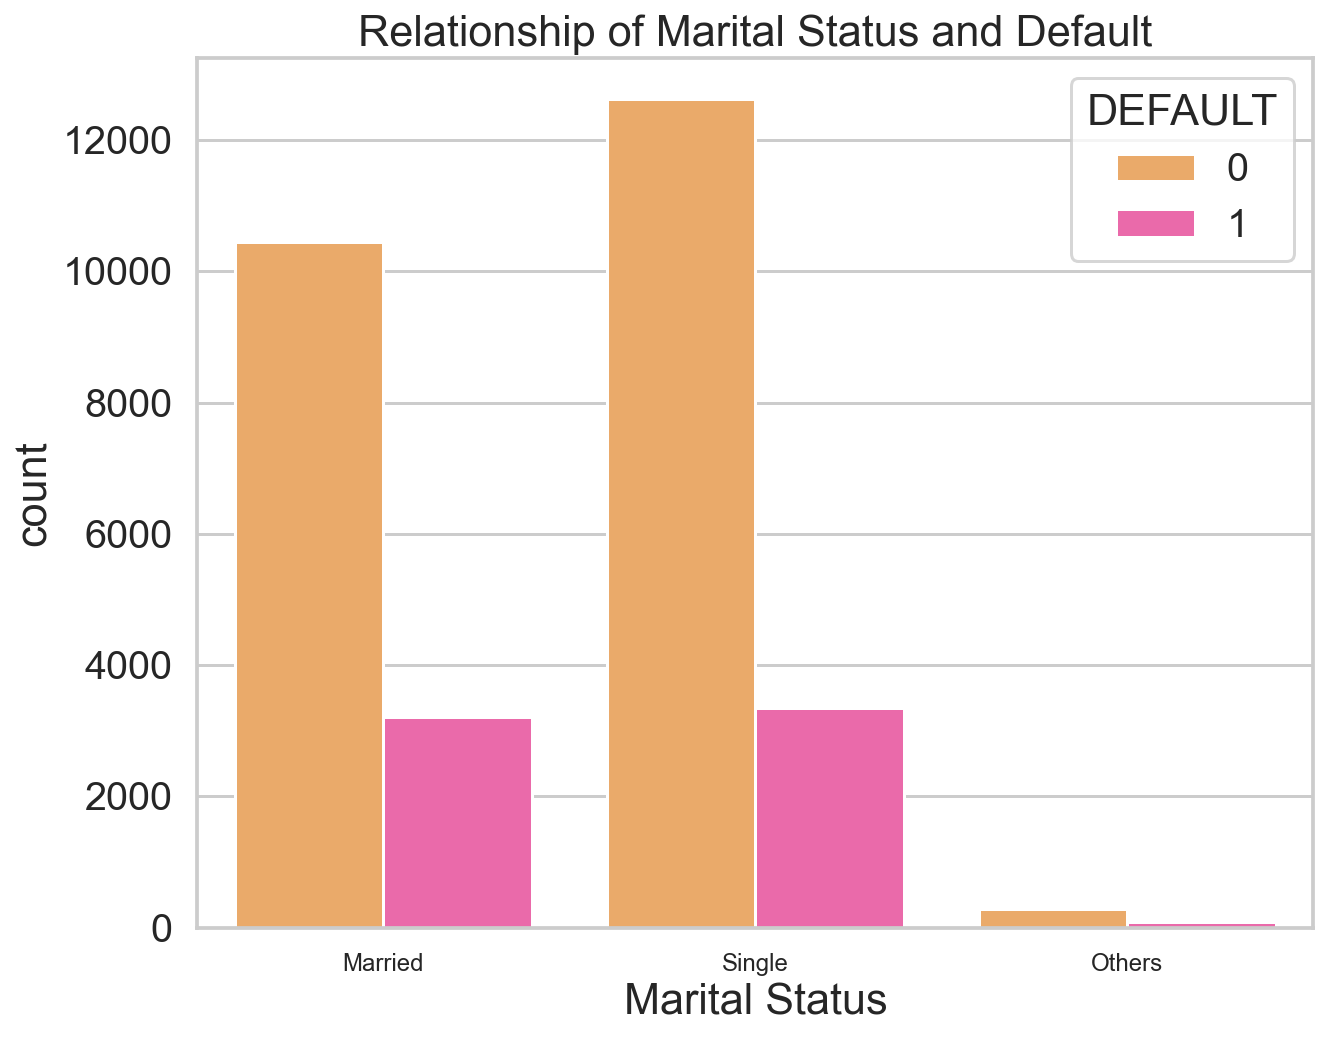

In [22]:
plt.figure(figsize=(10,8))
sns.countplot(data = credit_card_data,x = 'MARRIAGE', hue = 'DEFAULT', palette = "spring_r")
plt.xlabel('Marital Status')
plt.xticks([0,1,2], ['Married', 'Single', 'Others'], fontsize = 12)
plt.title('Relationship of Marital Status and Default')

Text(0.5, 0, 'Age')

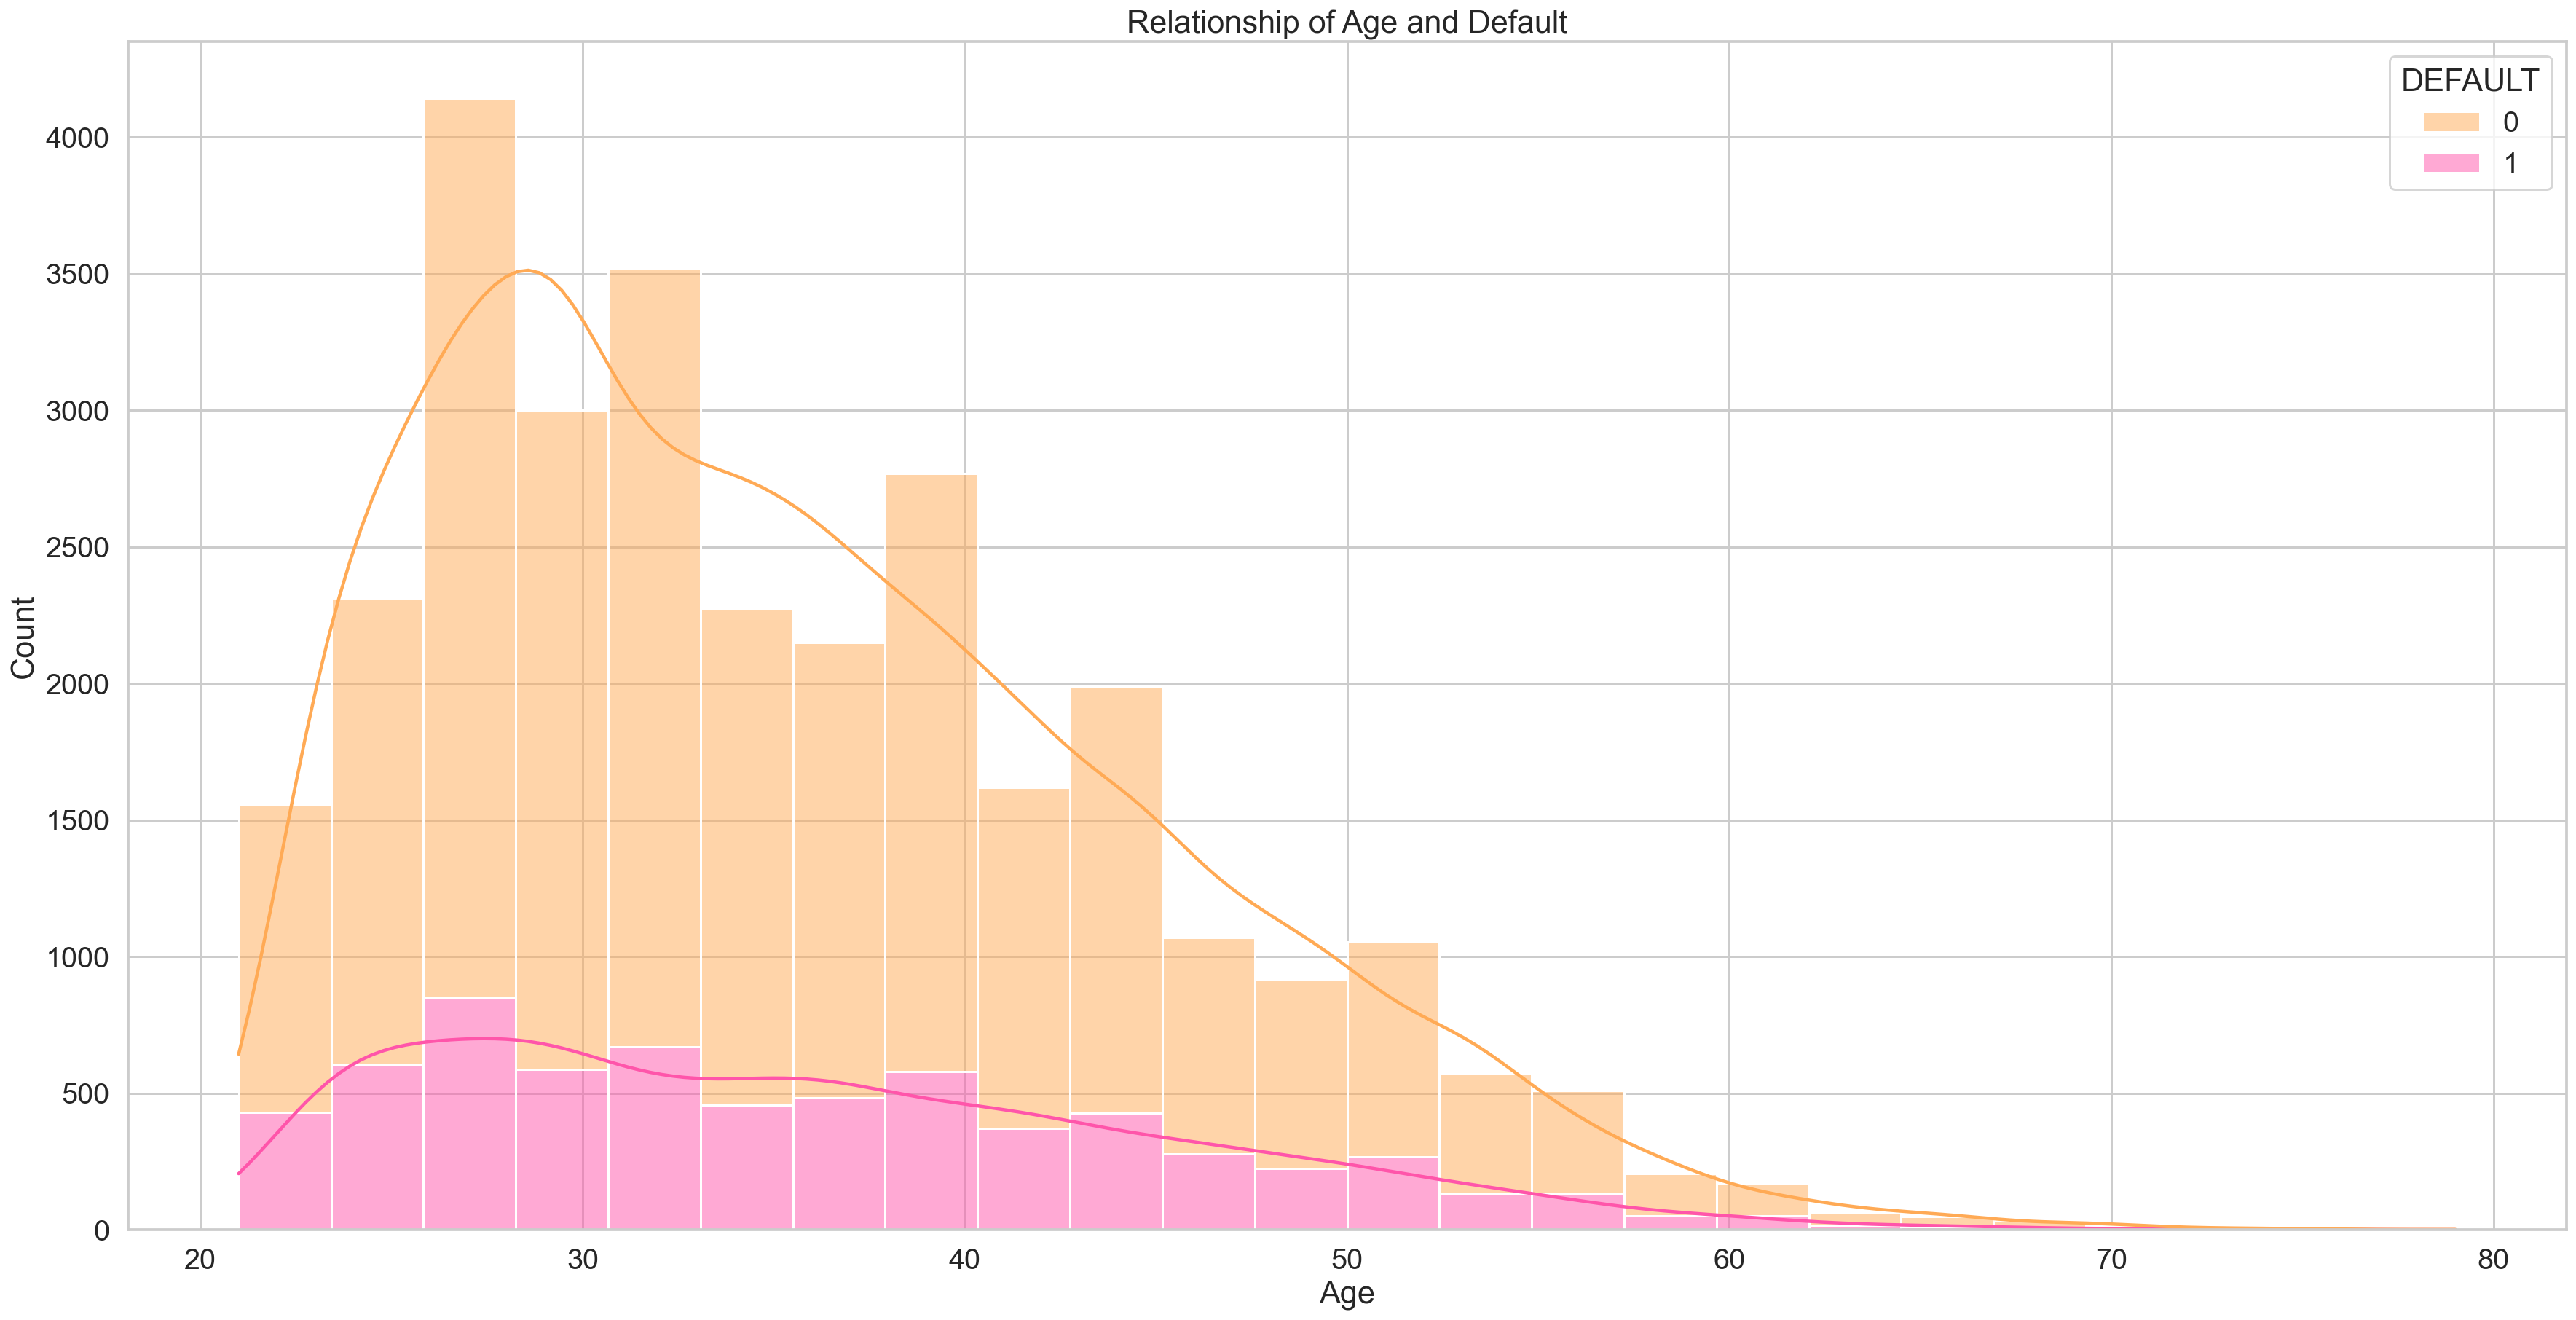

In [23]:
plt.figure(figsize = (30, 15))
plt.xticks(rotation = 0, horizontalalignment = "center")
sns.histplot(x = 'AGE', data = credit_card_data, palette = "spring_r", hue = 'DEFAULT', bins = 24 , multiple = "stack" , kde = True)
plt.title('Relationship of Age and Default')
plt.xlabel("Age")

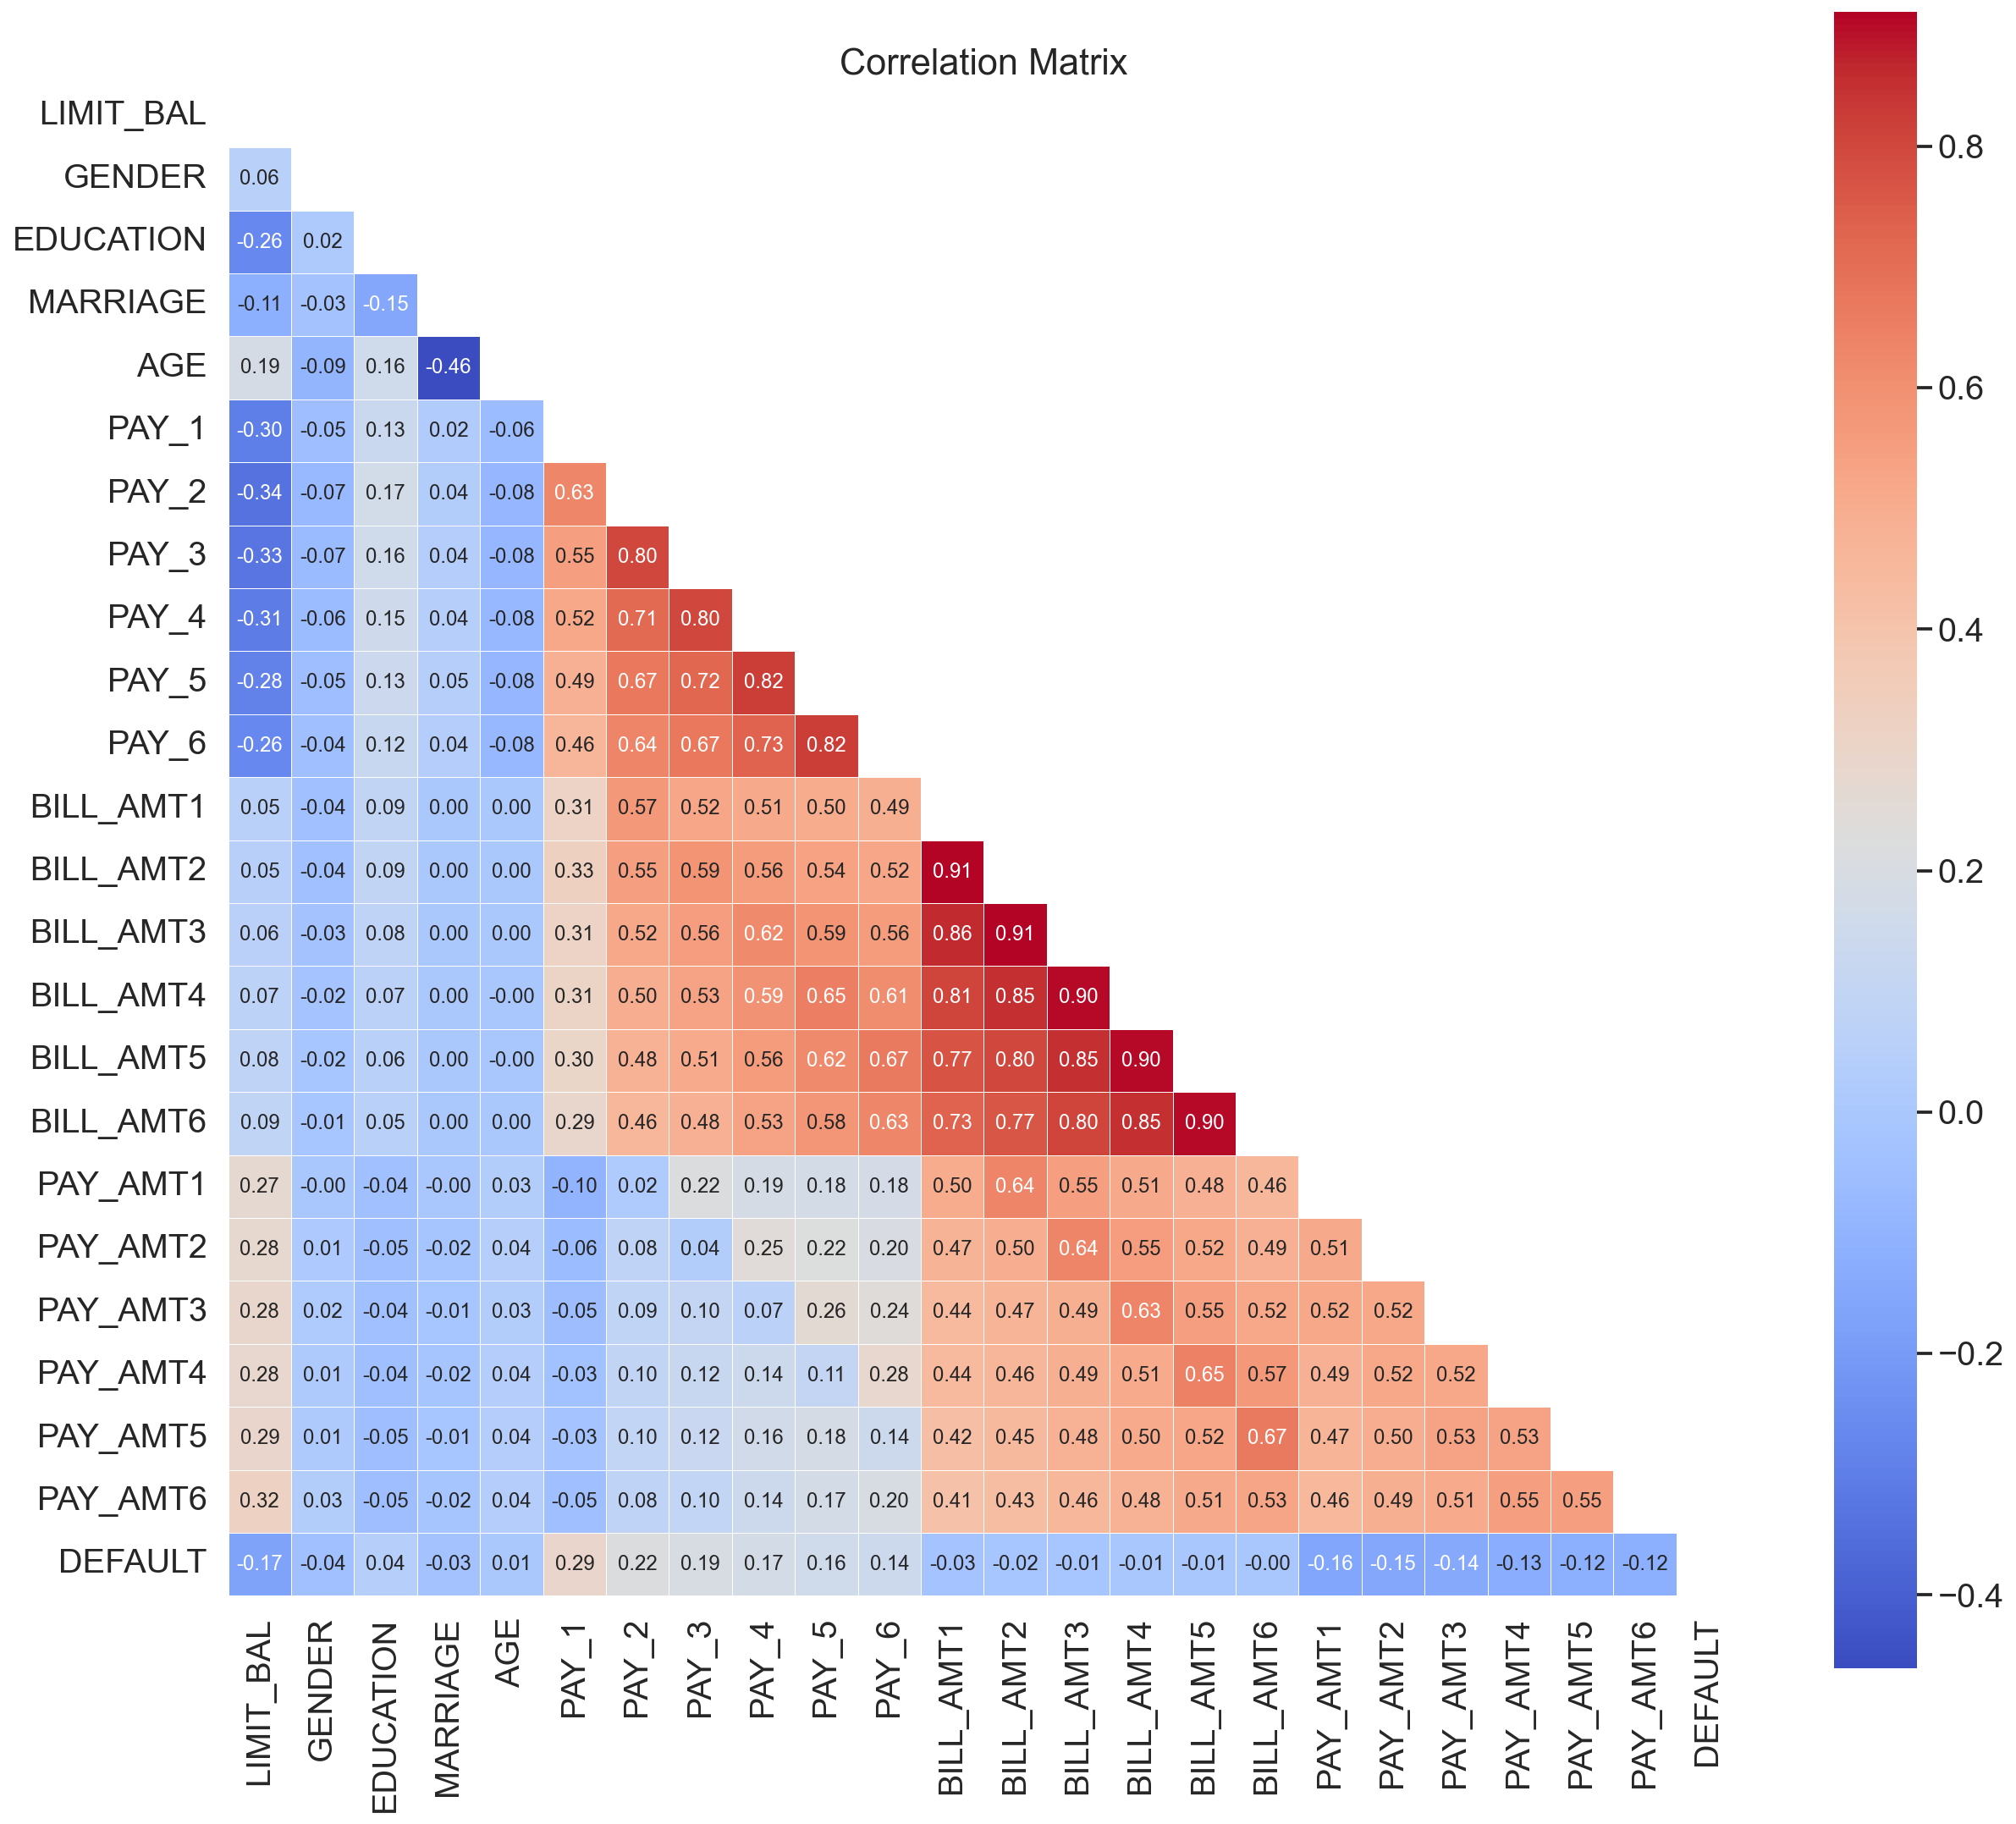

In [24]:
# Visualisation of the correlation matrix

credit_card = credit_card_data.drop('ID', axis = 1)
corr = credit_card.corr(method = 'spearman') 
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    plt.subplots(figsize = (20, 18))
    sns.heatmap(corr, mask = mask, square = True, linewidths = .3, fmt ='.2f', cmap = "coolwarm", annot = True, annot_kws={"size": 12})
plt.title('Correlation Matrix')
plt.show()

Text(0, 0.5, 'Client will default or not')

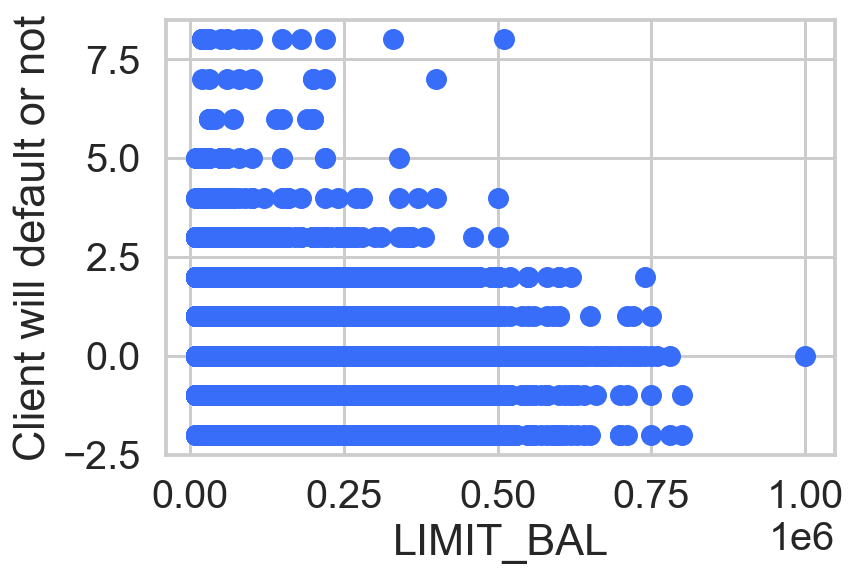

In [25]:
plt.scatter(credit_card_data['LIMIT_BAL'], credit_card_data['PAY_1'])
plt.xlabel('LIMIT_BAL')
plt.ylabel('Client will default or not')